1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


dataset shape: (3, 1000) 

covariance matrix of the dataset: 
 [[ 1.0965617   1.08176935  3.27489275]
 [ 1.08176935  9.72679104 11.89032975]
 [ 3.27489275 11.89032975 18.44011525]] 

eigenvalues of covariance matrix: [ 2.71661997e+01 -4.02485944e-16  2.09726829e+00] 

eigenvectors of covariance matrix: 
 [[-0.12591733 -0.81649658  0.563452  ]
 [-0.56416762 -0.40824829 -0.71766861]
 [-0.81600228  0.40824829  0.4092354 ]] 

eigenvalues with SVD: [2.71661997e+01 2.09726829e+00 3.45329189e-16] 

eigenvectors with SVD: 
 [[-0.12591733  0.563452   -0.81649658]
 [-0.56416762 -0.71766861 -0.40824829]
 [-0.81600228  0.4092354   0.40824829]] 

percent of total dataset's variability of each principal component: [9.28331519e+01 7.16684808e+00 1.18006926e-15] 

dataset rotated shape: (3, 1000) 

dataset reduced shape: (2, 1000) 



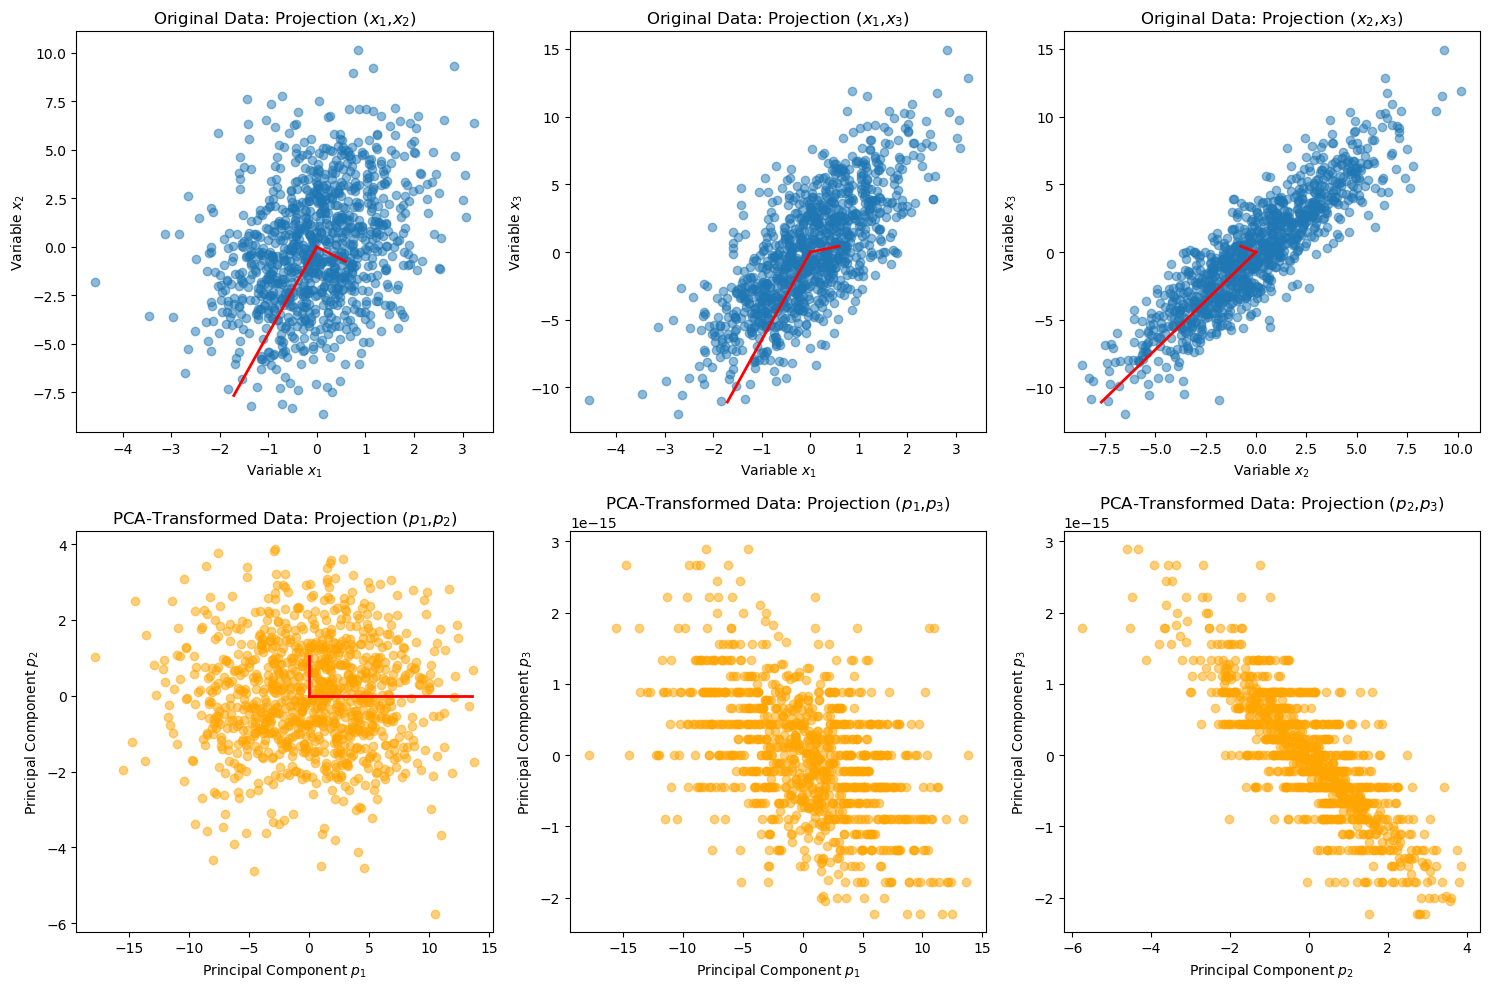

In [31]:
import numpy as np
import numpy.random as rnd
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

# Generate a dataset with 3 features as described above
x1 = rnd.normal(0,1, size = 1000)
x2 = x1 + rnd.normal(0,3, size = 1000)
x3 = 2*x1 + x2
#dset = np.array([x1,x2,x3]).T --> for now I do not transpose because np.cov interprets each row as a variable
dset = np.array([x1,x2,x3])
print("dataset shape:", np.shape(dset),'\n')

# Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
cov_matrix = np.cov(dset)
print("covariance matrix of the dataset:",'\n', cov_matrix, '\n')
l, V = la.eig(cov_matrix)
print("eigenvalues of covariance matrix:", np.real_if_close(l),'\n')
print("eigenvectors of covariance matrix:", '\n', V,'\n')

# Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
U, spectrum, Vt = la.svd(cov_matrix) #notice that Vt contains the eigenvectors as rows since it is transposed
print("eigenvalues with SVD:", spectrum, '\n')
print("eigenvectors with SVD:", '\n', U ,'\n') 

# What percent of the total dataset's variability is explained by the principal components?
# I use here the result obtained from SVD because usually in PCA you use this ordering: the first principal component is the one that retain's most of data's variability
Lambda=np.diag(spectrum) 
perc = (spectrum/Lambda.trace())*100
print("percent of total dataset's variability of each principal component:", np.real_if_close(perc), '\n')

# Reduce the dimensionality of the system so that at least 99% of the total variability is retained 
# First I need to rotate all the data accordingly to the new base (Redefine the data in the basis yielded by the PCA procedure)

rot_dset = np.dot(la.inv(U), dset) #Since U is orthonormal I could simply transpose U instead of inverting it
print("dataset rotated shape:", np.shape(rot_dset), '\n')
# Take off the last row
red_dset = np.delete(rot_dset, 2, axis = 0)
print("dataset reduced shape:", np.shape(red_dset), '\n')

#Plot the data points in the original and the new coordiantes as a set of scatter plots. 
#Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.
# Scatter plots for the original and transformed data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
projections = [(1, 2), (1, 3), (2, 3)]
# Plot projections of original data
for i, (p1, p2) in enumerate(projections):
    axes[0, i].scatter(dset[p1-1, :], dset[p2-1, :], alpha=0.5)
    axes[0, i].set_title(f'Original Data: Projection ($x_{p1}$,$x_{p2}$)')
    axes[0, i].set_xlabel(f'Variable $x_{p1}$')
    axes[0, i].set_ylabel(f'Variable $x_{p2}$')
    scale_factor = 0.5
    for li, vi in zip(spectrum, U.T):
        axes[0, i].plot([0, scale_factor * np.real_if_close(li * vi[p1-1])],[0, scale_factor * np.real_if_close(li * vi[p2-1])],'r-', lw=2)
    
# Plot projections of PCA-transformed data
for i, (p1, p2) in enumerate(projections):
    axes[1, i].scatter(rot_dset[p1-1, :], rot_dset[p2-1, :], alpha=0.5, color='orange')
    axes[1, i].set_title(f'PCA-Transformed Data: Projection ($p_{p1}$,$p_{p2}$)')
    axes[1, i].set_xlabel(f'Principal Component $p_{p1}$')
    axes[1, i].set_ylabel(f'Principal Component $p_{p2}$')
    for li, vi in zip(spectrum, U.T):  # Using the same eigenvalues and eigenvectors
        if i == 0:
            rotated_eigenvector = np.dot(U.T, vi)  # Rotate the eigenvector using U
            axes[1, i].plot([0, scale_factor * np.real_if_close(li * rotated_eigenvector[p1-1])],[0, scale_factor * np.real_if_close(li * rotated_eigenvector[p2-1])], 'r-', lw=2)
plt.tight_layout()
plt.show()

**NOTICE:** 
- Doesn't matter if you get a different order of the eigenvalues as long as everything is consistent. Moreover, the number with e-16 is basically zero. 

- np.linalg.eig: **No guaranteed order for eigenvalues or eigenvectors**; sort them manually if needed.
- np.linalg.svd: **Singular values are sorted in descending order**, and the corresponding singular vectors are aligned accordingly.

- What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? \
Given how the dataset was constructed: \
     $x_2 = x_1 + \mathcal{N}(0, 3)$: $ x_2 $ is highly correlated with $ x_1 $ but includes added noise, increasing the variability. \
     $ x_3 = 2x_1 + x_2 $: $ x_3 $ is a linear combination of $ x_1 $ and $ x_2 $, which means it is strongly correlated with both. 

This setup ensures:  \
 The first principal component explains most of the variability, as the dataset has a dominant linear structure. \
 The second and third components capture much smaller variability, consistent with the noise and redundancy in $ x_2 $ and $ x_3 $. 
 
 When I say the dataset has a **dominant linear structure**, I am referring to the fact that the majority of the variability in the dataset can be explained by a single linear combination of the features (i.e., the principal component with the largest eigenvalue). \

Indeed $ x_2 $ is strongly correlated with $ x_1 $, as it is derived by adding noise to $ x_1 $. This noise introduces some variability but does not fundamentally change the underlying relationship. \
$x_3 = 2x_1 + x_2 $: $ x_3 $ is a linear combination of $ x_1 $ and $ x_2 $, meaning it does not introduce any new independent information! It is entirely determined by $ x_1 $ and $ x_2 $.

This means that the data points lie approximately along a plane in the 3D feature space, and most of the variability can be captured along one principal direction. \

**Principal components (the eigenvectors of the covariance matrix) identify the directions in feature space that explain the variability in the data:** \
    - **The first principal component corresponds to the direction of maximum variance.** \
    - **Subsequent components explain the remaining variability, orthogonal to each other.** 

For my dataset:
- The first principal component captures the dominant direction of variability, as the dataset primarily varies due to $ x_1 $'s influence (and $ x_3 $ depends on $ x_1 $).

**Geometric Interpretation:** \
In 3D space:
- The points approximately form a thin elongated shape (close to a 2D plane), rather than spreading evenly in all directions.
- Most points are aligned along one dominant axis, with smaller variations in orthogonal directions.
- All points in the dataset lie approximately in a **2D plane** embedded in 3D space.

**Mathematical Explanation** \
Due to the linear relationship $x_3 = 2x_1 + x_2$, any point in the dataset satisfies:  
$
x_3 - 2x_1 - x_2 = 0
$
This is the **equation of a plane** in 3D space. In general, a plane in 3D is defined as:  
$
a x_1 + b x_2 + c x_3 + d = 0
$ 
In this case:  
- $a = -2$, $b = -1$, $c = 1$, and $d = 0$.  

1. The plane is spanned by two principal directions (the first two principal components), which capture most of the variability in the data.  
2. Any deviations from this plane are small and correspond to noise (the random component added to $x_2$). Indeed, if there was no noise at all then you'd lay on the plane and in particular on the line x1 = x2 (Indeed you have 2 relations and 3 dimensions). However due to the noise added you deviate a bit from that line and THE NOISE PROPAGATES also to $x_3$ so you also deviate a bit from the plane!  

Imagine plotting the points in a 3D coordinate system ($x_1$, $x_2$, $x_3$):  
- Instead of spreading evenly throughout the 3D space, the points form a thin "sheet" or "plane."  
- The principal components calculated from the covariance matrix align with this plane:  
  - The first principal component lies along the direction of maximum variability.  
  - The second lies within the plane but orthogonal to the first.  
  - The third captures variability perpendicular to the plane (which will be very small due to noise).  

**Why This Matters** \
The presence of a plane indicates that:  
- The data is highly structured, with most variability constrained to a lower-dimensional subspace (a plane in this case).  
- Dimensionality reduction techniques like PCA can effectively represent the data in 2D without significant loss of information.  

**Transforming the dataset into the new eigenvalues basis**
When you decompose a $ n \times n $ matrix $ A $ into its eigenvalues and eigenvectors, the process involves finding a diagonal matrix $ \Lambda $ and a matrix $ P $ such that:

$
A = P \Lambda P^{-1}
$

where:
- $ \Lambda $ is a diagonal matrix containing the eigenvalues of $ A $.
- $ P $ is a matrix whose columns are the eigenvectors of $ A $.

To express any vector $ v $ in the eigenvector basis (the basis defined by the columns of $ P $), you perform the following steps:

1. **Change of Basis**: Multiply $ v $ by $ P^{-1} $ to get the representation of $ v $ in the eigenvector basis:
   $
   v_{\text{eigenbasis}} = P^{-1} v
   $

   Here, $ v_{\text{eigenbasis}} $ contains the coefficients of $ v $ in terms of the eigenvectors.

2. **Reconstruction**: To return from the eigenvector basis to the original basis, multiply by $ P $:
   $
   v = P v_{\text{eigenbasis}}
   $
   
   
**Using zip to draw the red line**
The `zip()` function in Python is used to combine two or more iterables (like lists, tuples, or arrays) element by element. It creates a new iterator where each item is a tuple containing the corresponding elements from the input iterables. 

*Syntax*:
```python
zip(iterable1, iterable2, ...)
```

*How It Works*:
- If the input iterables have different lengths, `zip()` stops creating tuples when the shortest input iterable is exhausted.
- The result is an iterator, which can be converted into a list, tuple, or iterated over directly.

---

*Basic Usage*
```python
list1 = [1, 2, 3]
list2 = ['a', 'b', 'c']
zipped = zip(list1, list2)
print(list(zipped))
```
*Output:*
```
[(1, 'a'), (2, 'b'), (3, 'c')]
```

---

*Example 2: Iterating Over a `zip` Object*
```python
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30, 35]

for name, age in zip(names, ages):
    print(f'{name} is {age} years old.')
```
*Output:*
```
Alice is 25 years old.
Bob is 30 years old.
Charlie is 35 years old.
```

---

*Usage in this code*
```python
for li, vi in zip(spectrum, U.T):
    axes[0, i].plot(
        [0, scale_factor * np.real_if_close(li * vi[p1])],
        [0, scale_factor * np.real_if_close(li * vi[p2])],
        'r-', lw=2
    )
```

- `spectrum` contains the eigenvalues.
- `U.T` contains the transposed eigenvectors matrix (columns become rows).
- `zip(l, U.T)` pairs each eigenvalue (`li`) with its corresponding eigenvector (`vi`).
- Inside the loop, this combination is used to draw the red lines for each eigenvalue-eigenvector pair.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$. \

N.B: Basically what I have to do is increase the dimensionality of my data set adding gaussian variables (I will still have a thousand points, but each one of them is gonna be identified using a vector of 13 values, 10 of which are uncorrelated from previous ones.)

Repeat the PCA procedure and compare the results with what you obtained before

[(1, 2), (1, 3), (2, 3)]
Total number of combinations: 3
(13, 1000)
Number of components to retain 99% variability: 2

Reduced dataset shape: (2, 1000) 



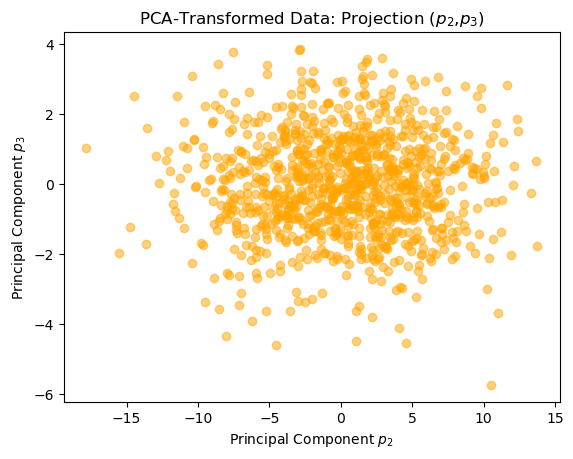

In [32]:
from itertools import combinations

print(projections)
print(f"Total number of combinations: {len(projections)}")

# Add uncorrelated random noise
dset = list(dset)
for i in range(10): 
    k = rnd.randint(1,9)
    x = rnd.normal(0, k/50, size = 1000)
    dset.append(x)
print(np.shape(dset))

# Repeat PCA process
new_cov_matrix = np.cov(dset)
# Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
new_U, new_spectrum, new_Vt = la.svd(new_cov_matrix) #notice that Vt contains the eigenvectors as rows since it is transposed
#print("new eigenvalues:", new_spectrum, '\n')
#print("new eigenvectors:", '\n', new_U ,'\n') 
new_lambda=np.diag(new_spectrum) 
new_perc = (new_spectrum/new_lambda.trace())*100
#print("new_percentages of total dataset's variability of each principal component:", np.real_if_close(new_perc), '\n')
# Dimensionality reduction for 99% variance
cumulative_variance = np.cumsum(new_perc) #returns the index of the first occurrence of True
num_components = np.argmax(cumulative_variance >= 99) + 1
print(f"Number of components to retain 99% variability: {num_components}\n")
# Rotate dataset to PCA basis
new_rot_dset = np.dot(new_U.T, dset)  # Rotate data using the eigenvectors
new_red_dset = new_rot_dset[:num_components, :]  # Retain only top components
print("Reduced dataset shape:", new_red_dset.shape, '\n')
# Scatter plots for the transformed data
plt.scatter(rot_dset[0, :], rot_dset[1, :], alpha=0.5, color='orange')
plt.title(f'PCA-Transformed Data: Projection ($p_{p1}$,$p_{p2}$)')
plt.xlabel(f'Principal Component $p_{p1}$')
plt.ylabel(f'Principal Component $p_{p2}$')
for li, vi in zip(spectrum, U.T):  # Using the same eigenvalues and eigenvectors
    if i == 0:
        rotated_eigenvector = np.dot(U.T, vi)  # Rotate the eigenvector using U
        plt.plot([0, scale_factor * np.real_if_close(li * rotated_eigenvector[p1-1])],[0, scale_factor * np.real_if_close(li * rotated_eigenvector[p2-1])], 'r-', lw=2)
plt.show()

**NOTICE:**
The reason we use `argmax` instead of `argmin` lies in how the logic is structured:

1. **What `argmax` does in this case**:
   - It finds the first `True` in the boolean array \( \text{cumulative_variance} \geq 99 \), because `True` is equivalent to `1` in a numerical sense.
   - `np.argmax` works on the boolean array to return the **index of the first occurrence of the maximum value**, which here is the first `True`.

2. **Why not `argmin`?**:
   - `argmin` finds the **index of the minimum value**. In the boolean array \( \text{cumulative_variance} \geq 99 \), the minimum value is `False` (equivalent to `0`), which will always occur **before the first `True`**. 
   - Using `argmin` would give the **wrong index** since it would point to the first `False`.

**RESULT:**
Basically still the first two principal components are those that matter because afterall the added ones are uncorrelated and have a very small variance.\
Adding uncorrelated random noise to your dataset introduces additional features that contribute very little variability to the overall dataset because the noise has a much smaller standard deviation compared to the original features $ x_1 $ and $ x_2 $. 

Expectations:
1. **Eigenvalues**:
   - The eigenvalues corresponding to the noise variables will be much smaller than those associated with the original dataset, reflecting their minimal contribution to the dataset's overall variability.

2. **Principal Components**:
   - The principal components associated with the original data will remain largely unchanged because the noise variables do not introduce significant correlations or structure.
   - Additional principal components will emerge for the noise variables, but these will have very small eigenvalues.

3. **Explained Variance**:
   - The first few principal components (those capturing the variability of \( x_1, x_2, x_3 \)) will still explain the majority of the variance.
   - The additional principal components from the noise will contribute negligibly to the total explained variance.

4. **Dimensionality Reduction**:
   - If you apply dimensionality reduction (e.g., retaining components explaining 99% of the variability), the number of retained components may remain the same or increase slightly, depending on how much variance the noise adds.

**Comparisons:**
- **Original vs. Noise-Added Dataset**:
  - The overall structure of the dataset will remain dominated by the variability of the original features \( x_1, x_2, x_3 \).
  - The noise will increase the dimensionality of the dataset without significantly altering the results for the primary components.

- **Cumulative Variance Explained**:
  - The curve of cumulative variance explained will be similar for the first few components but will level off more slowly due to the contributions of the noise variables.

**NOTICE:**
If there were correlations the situation would be much different!
Yes, even small fluctuations from **correlated noise** can significantly affect the dataset's structure, depending on the nature and strength of the correlations. 
Here's why:

- 1. Amplification of Variance
   - **Correlated noise introduces patterns**: Even small correlations create relationships between variables, causing the covariance matrix to reflect this additional structured variability.
   - Since PCA captures patterns of maximal variance, even slight correlations in noise can shift the direction and magnitude of principal components.

  Example:
   - Imagine adding a correlated noise variable \( N \) that is \( N \approx 0.1X_1 + 0.1X_2 + \epsilon \), where \( X_1 \) and \( X_2 \) are original variables and \( \epsilon \) is some random component.
   - Although \( N \) has a small influence, it will combine the information from \( X_1 \) and \( X_2 \), potentially altering their contributions to the PCA results.


- 2. Shift in Principal Component Directions**
   - Even a small amount of correlated noise can **rotate the principal axes**, altering the loadings (weights) of each variable on the components.
   - This can make it harder to interpret which features are driving the variability because the original dataset’s structure gets mixed with the noise correlations.

- 3. Change in Eigenvalues**
   - **Eigenvalues reflect variance**: Small fluctuations in correlated noise can add up across the dataset, leading to higher eigenvalues for the noise dimensions.
   - As a result, the **relative importance** of the original features diminishes, as more variance is attributed to the noise.
   
- 4. Influence on Dimensionality Reduction**
   - PCA selects components based on their contribution to total variance. Correlated noise increases variance across more directions, making it harder to determine how many dimensions to retain.
   - The noise can create the illusion of additional “important” components, increasing the number of dimensions required to explain the same percentage of variability (e.g., 99%).

**Summing up:  this is why Correlated Noise Has a Bigger Impact Than Uncorrelated Noise**
1. **Uncorrelated noise**:
   - Adds small, independent variance to individual dimensions.
   - The covariance matrix only sees diagonal entries for this noise, and these are typically small compared to the original features' variances.
   - PCA essentially "ignores" this noise.

2. **Correlated noise**:
   - Adds off-diagonal entries in the covariance matrix, representing relationships between noise variables or between noise and original features.
   - PCA interprets these as meaningful patterns, leading to new principal components that reflect both the noise and original features.


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 